# Lab3 (Student version)
## Students:
## Jack Thay - 21201079
## Thierry Ung - 3804472

In [1]:
import random
import matplotlib.pyplot as plt
import sys
import time # Replaced timeit with time to measure execution time from our code
import math

from IPython.display import Image # Used to display image in this notebook
from collections import defaultdict, deque # Used as dict and queue

Download the three following graphs:
- http://lioneltabourier.fr/documents/drosophila.txt
- http://snap.stanford.edu/data/com-LiveJournal.html    
- http://snap.stanford.edu/data/com-Amazon.html
- http://snap.stanford.edu/data/email-Eu-core.html (optional, might be too large)

### Sidenote:
Using "amazon" graph (added in the above links) instead of "live journal" for faster loading on low-end computer.

It is also useful to consider some toy graphs (e.g. manually created graphs with a dozen nodes) to test your programs.

## Exercise 0: preliminaries

Using the codes of Lab1, load the graphs in memory as dictionary of lists and check their number of nodes and links.

In [2]:
# Code taken from our TP1

def count_nodes_edges(filename):
    # Initialize an empty set to store unique nodes
    nodes = set()
    # Initialize a variable to count the number of edges
    edges = 0

    # Open the specified file in read ('read only') mode
    with open(filename, 'r') as file:
        # Iterate through each line in the file
        for line in file:
            # Remove leading and trailing whitespace and split the line into parts
            edge_info = line.strip().split()
            # Check if the line does not contain exactly two values (node identifiers)
            if len(edge_info) != 2:
                # Skip lines that don't have two values, they might be comments or errors
                continue
            # Add both node identifiers to the 'nodes' set
            nodes.update(edge_info)
            # Increment the edge count
            edges += 1

    # Calculate the number of unique nodes by finding the length of the 'nodes' set
    num_nodes = len(nodes)
    # final count for edges
    num_edges = edges

    # Return the counts of nodes and edges as a tuple
    return num_nodes, num_edges

In [3]:
def optimized_count_nodes_edges(filename):
    # Initialize an empty set to store unique nodes
    nodes = set()
    # Initialize an empty set to store unique edges
    unique_edges = set()

    # Open the specified file in read ('r') mode
    with open(filename, 'r') as file:
        # Iterate through each line in the file
        for line in file:
            # Skip lines starting with '#' (comments)
            if line.startswith('#'):
                continue
            # Remove leading and trailing whitespace and split the line into parts
            edge_info = line.strip().split()
            # Check if the line does not contain exactly two values (node identifiers)
            if len(edge_info) != 2:
                # Skip lines that don't have two values
                continue
            # Sort the edge_info to ensure order independence and convert it to a tuple
            edge = tuple(sorted(edge_info))
            # Check if the edge is not already in the set of unique_edges
            if edge not in unique_edges:
                # Add the edge to the set of unique_edges
                unique_edges.add(edge)
                # Add both node identifiers to the 'nodes' set
                nodes.update(edge_info)

    # Calculate the number of unique nodes by finding the length of the 'nodes' set
    num_nodes = len(nodes)
    # The total number of unique edges has already been counted in the 'unique_edges' set
    num_edges = len(unique_edges)

    # Return the counts of nodes and edges as a tuple
    return num_nodes, num_edges

In [4]:
# Code taken from our TP1

def load_graph(filename):
    # Initialize an empty dictionary for the adjacency list.
    adjacency_list = {}
    
    # Open the specified file for reading.
    with open(filename, 'r') as file:
        # Loop through each line in the file.
        for line in file:
            # Check if the line does not start with '#' (comments)
            if not line.startswith('#'):
                # Split the line into two nodes representing an edge.
                edge_info = line.strip().split()
                node1, node2 = edge_info[0], edge_info[1]
                # Check if node1 is not already in the adjacency list.
                if node1 not in adjacency_list:
                    # Initialize an empty list for node1 in the adjacency list.
                    adjacency_list[node1] = []
                # Check if node2 is not already in the adjacency list.
                if node2 not in adjacency_list:
                    # Initialize an empty list for node2 in the adjacency list.
                    adjacency_list[node2] = []
                # Add node2 to the adjacency list of node1 (representing an undirected edge).
                adjacency_list[node1].append(node2)
                # Add node1 to the adjacency list of node2 (since it's an undirected edge).
                adjacency_list[node2].append(node1)

    # Return the adjacency list representing the undirected graph.
    return adjacency_list

In [5]:
# Code written to help us check our results

def test_count_nodes_edges(filename):
    start_time = time.time()
    num_nodes, num_edges = count_nodes_edges(filename)
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    print(f"Nodes and edges counted in {time.time() - start_time:.5f} seconds")

In [6]:
# Code written to help us check our results

def test_optimized_count_nodes_edges(filename):
    start_time = time.time()
    num_nodes, num_edges = optimized_count_nodes_edges(filename)
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    print(f"Nodes and edges counted in {time.time() - start_time:.5f} seconds")

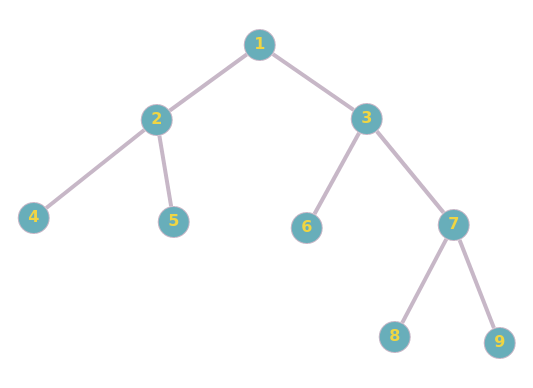

In [7]:
# Displaying our test_graph, it should have 9 nodes and 8 edges
Image(filename="./test_graph.png")

In [8]:
# Checking our test_graph
filename = 'test_graph.txt'
result = test_count_nodes_edges(filename)

Number of nodes: 9
Number of edges: 8
Nodes and edges counted in 0.00200 seconds


In [9]:
# Loading our test_graph.txt into a variable for easier use down the line
filename = 'test_graph.txt'
start_time = time.time()
test_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.00102 seconds


In [10]:
# Testing drosophila graph
filename = 'drosophila.txt'
result = test_count_nodes_edges(filename)

Number of nodes: 7236
Number of edges: 22425
Nodes and edges counted in 0.01319 seconds


In [11]:
# Loading droshophila.txt into a variable for easier use down the line
filename = 'drosophila.txt'
start_time = time.time()
drosophila_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.02044 seconds


In [12]:
# Testing email-Eu-core graph
filename = 'email-Eu-core.txt'
result = test_count_nodes_edges(filename)

Number of nodes: 1005
Number of edges: 25571
Nodes and edges counted in 0.01634 seconds


In [13]:
# Loading our email-Eu-core.txt into a variable for easier use down the line
filename = 'email-Eu-core.txt'
start_time = time.time()
email_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.02192 seconds


In [14]:
# Testing amazon graph
filename = 'com-amazon.ungraph.txt'
result = test_optimized_count_nodes_edges(filename)

Number of nodes: 334863
Number of edges: 925872
Nodes and edges counted in 1.50957 seconds


In [15]:
# Loading our com-amazon.ungraph.txt into a variable for easier use down the line
filename = 'com-amazon.ungraph.txt'
start_time = time.time()
amazon_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 1.47459 seconds


In [16]:
# Testing Live journal graph
filename = 'com-lj.ungraph.txt'
result = test_optimized_count_nodes_edges(filename)

Number of nodes: 3997962
Number of edges: 34681189
Nodes and edges counted in 56.91983 seconds


In [17]:
# Loading com-lj.ungraph.txt into a variable for easier use down the line
filename = 'com-lj.ungraph.txt'
start_time = time.time()
live_journal = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 49.03737 seconds


### Sidenote: 
We might skip the "live journal" graph, as this graph is huge, unless we're using a high-end computer, working on this graph will take too long.

## Exercise 1: BFS

### 1.1 Components

- Implement a BFS algorithm.  

- Use it on each of the graphs to evaluate the size of the largest connected component of these graphs.
- Use it to identify all connected components.

Warning: if your BFS is not well coded, it can be very long, so if it doesn't work on Amazon or LiveJournal in less than a few minutes, either improve your code, or test only on smaller graphs. 

In [18]:
def bfs(graph, start_node):
    # Initialize a set to keep track of visited nodes
    visited = set()
    # Initialize a deque (double-ended queue) with the starting node
    queue = deque([start_node])
    # Initialize a list to store the connected component (nodes visited during BFS)
    component = []

    # Main BFS loop
    while queue:
        # Get the current node from the front of the queue
        current = queue.popleft()
        # Check if the current node has not been visited
        if current not in visited:
            # Mark the current node as visited
            visited.add(current)
            # Add the current node to the connected component
            component.append(current)
            # Extend the queue with unvisited neighbors of the current node
            queue.extend(node for node in graph[current] if node not in visited)

    # Return the connected component
    return component

In [19]:
def bfs_with_print(graph, start_node):
    # Check if the starting node exists in the graph
    if start_node not in graph: # In case someone decides to be funny and use a non-existing node
        print(f"<!>Error<!>: The starting node '{start_node}' not found in the graph.")
        print(f"<!>Error<!>: Are you sure you didn't make a typo?")
        return
    
    # Initialize a set to keep track of visited nodes
    visited = set()
    # Initialize a deque (double-ended queue) with the starting node
    queue = deque([start_node])
    # Initialize a list to store the connected component (nodes visited during BFS)
    component = []
    # Initialize counters for nodes visited and all nodes traversed
    nodes_visited = 0
    all_nodes = []

    # Main BFS loop
    while queue:
        # Get the current node from the front of the queue
        current = queue.popleft()
        # Check if the current node has not been visited
        if current not in visited:
            # Mark the current node as visited
            visited.add(current)
            # Add the current node to the connected component
            component.append(current)
            # Increment the nodes_visited counter and add the node to the all_nodes list
            nodes_visited += 1
            all_nodes.append(current)
            # Extend the queue with unvisited neighbors of the current node
            queue.extend(node for node in graph[current] if node not in visited)
    print("=>BFS completed")

    # Print the nodes visited, showing either all or the first and last 10, since we have so crazy big graphs in this lab
    if nodes_visited <= 10:
        print(*all_nodes, end=' ')
        print("\nPrinted all nodes.")
    else:
        print(*all_nodes[:10], end=' ')
        print(*all_nodes[-10:], end=' ')
        print("\nPrinted the first and last 10 for better readability.")

    # Return the connected component
    return component

In [20]:
def test_bfs(graph, start_node):
    start_time = time.time()
    print(f"BFS starting from vertex {start_node}:")
    result = bfs_with_print(graph, start_node)
    print(f"\nBFS done in {time.time() - start_time:.5f} seconds")

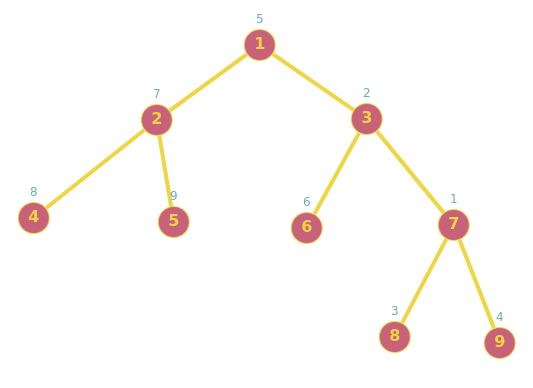

In [21]:
# Displaying Test_graph, with BFS algorithm applied for node 7, for visual confirmation
Image(filename="./test_graph_BFS.png")

In [22]:
graph = test_graph
start_node = "7"
result = test_bfs(graph, start_node)

BFS starting from vertex 7:
=>BFS completed
7 3 8 9 1 6 2 4 5 
Printed all nodes.

BFS done in 0.00000 seconds


In [23]:
graph = drosophila_graph
start_node = "0"
result = test_bfs(graph, start_node)

BFS starting from vertex 0:
=>BFS completed
0 1 2 3 4 5 6 7 8 9 3985 65 2428 5688 5213 7183 6249 6269 6754 7052 
Printed the first and last 10 for better readability.

BFS done in 0.01711 seconds


In [24]:
graph = email_graph
start_node = "0"
result = test_bfs(graph, start_node)

BFS starting from vertex 0:
=>BFS completed
0 1 17 316 146 581 268 221 218 18 995 583 794 876 915 846 634 449 603 916 
Printed the first and last 10 for better readability.

BFS done in 0.01050 seconds


In [25]:
graph = amazon_graph
start_node = "1"
result = test_bfs(graph, start_node)

BFS starting from vertex 1:
=>BFS completed
1 88160 118052 161555 244916 346495 444232 447165 500600 48724 500867 532649 121514 482622 271203 276695 321818 321821 262774 150736 
Printed the first and last 10 for better readability.

BFS done in 0.85448 seconds


In [26]:
# Comment or uncomment this part if you're confident your computer can handle it
graph = live_journal
start_node = "1"
result = test_bfs(graph, start_node)

BFS starting from vertex 1:
=>BFS completed
1 0 2 3 4 5 6 7 8 9 3864109 3875339 3847906 3847911 3988338 3988339 3373887 3965135 3911578 3847908 
Printed the first and last 10 for better readability.

BFS done in 27.89127 seconds


### Sidenote:
Our code was able to do a BFS algorithm in less than 30 seconds with the "live journal" graph with a high-end computer with 64GB of RAM.   
    We can safely conclude that our code is optimized enough.

In [27]:
def connected_components(graph):
    # Initialize a set to keep track of visited nodes
    visited = set()
    # Initialize a list to store connected components
    components = []

    # Iterate through all vertices in the graph
    for node in graph:
        # Check if the node has not been visited
        if node not in visited:
            # Use BFS to find the connected component starting from the current node
            component = bfs(graph, node)
            # Append the connected component to the list of components
            components.append(component)
            # Mark all nodes in the component as visited
            visited.update(component)

    # Return the list of connected components
    return components

In [28]:
def process_graph(graph):
    start_time = time.time()
    # Find the largest connected component
    components = connected_components(graph)
    largest_component = max(components, key=len)
    
    # Display the largest connected component
    if len(largest_component) > 10:
        print(f"Largest connected component: {largest_component[:10]}...{largest_component[-10:]}")
    else:
        print(f"Largest connected component: {largest_component}")
    
    print(f"\nSize of the largest connected component: {len(largest_component)}")
    print("\nAll connected components:")
    
    # Display all connected components
    for i, component in enumerate(components, 1):
        if len(component) > 10:
            print(f"Component {i}: {component[:10]}...{component[-10:]}")
        else:
            print(f"Component {i}: {component}")
    
    print(f"\nConnected components found in {time.time() - start_time:.5f} seconds")

In [29]:
graph = test_graph
result = process_graph(graph)

Largest connected component: ['2', '1', '4', '5', '3', '6', '7', '8', '9']

Size of the largest connected component: 9

All connected components:
Component 1: ['2', '1', '4', '5', '3', '6', '7', '8', '9']

Connected components found in 0.00000 seconds


In [30]:
graph = drosophila_graph
result = process_graph(graph)

Largest connected component: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']...['3985', '65', '2428', '5688', '5213', '7183', '6249', '6269', '6754', '7052']

Size of the largest connected component: 7236

All connected components:
Component 1: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']...['3985', '65', '2428', '5688', '5213', '7183', '6249', '6269', '6754', '7052']

Connected components found in 0.01686 seconds


In [31]:
graph = email_graph
result = process_graph(graph)

Largest connected component: ['0', '1', '17', '316', '146', '581', '268', '221', '218', '18']...['995', '583', '794', '876', '915', '846', '634', '449', '603', '916']

Size of the largest connected component: 986

All connected components:
Component 1: ['0', '1', '17', '316', '146', '581', '268', '221', '218', '18']...['995', '583', '794', '876', '915', '846', '634', '449', '603', '916']
Component 2: ['580']
Component 3: ['633']
Component 4: ['648']
Component 5: ['653']
Component 6: ['658']
Component 7: ['660']
Component 8: ['670']
Component 9: ['675']
Component 10: ['684']
Component 11: ['691']
Component 12: ['703']
Component 13: ['711']
Component 14: ['731']
Component 15: ['732']
Component 16: ['744']
Component 17: ['746']
Component 18: ['772']
Component 19: ['798']
Component 20: ['808']

Connected components found in 0.00958 seconds


In [32]:
graph = amazon_graph
result = process_graph(graph)

Largest connected component: ['1', '88160', '118052', '161555', '244916', '346495', '444232', '447165', '500600', '48724']...['500867', '532649', '121514', '482622', '271203', '276695', '321818', '321821', '262774', '150736']

Size of the largest connected component: 334863

All connected components:
Component 1: ['1', '88160', '118052', '161555', '244916', '346495', '444232', '447165', '500600', '48724']...['500867', '532649', '121514', '482622', '271203', '276695', '321818', '321821', '262774', '150736']

Connected components found in 0.96988 seconds


In [33]:
# Comment or uncomment this part if you're confident your computer can handle it
graph = live_journal
result = process_graph(graph)

Largest connected component: ['0', '1', '2', '31', '73', '80', '113619', '2468556', '2823829', '2823833']...['3864109', '3875339', '3373887', '3847906', '3847911', '3965135', '3988338', '3988339', '3911578', '3847908']

Size of the largest connected component: 3997962

All connected components:
Component 1: ['0', '1', '2', '31', '73', '80', '113619', '2468556', '2823829', '2823833']...['3864109', '3875339', '3373887', '3847906', '3847911', '3965135', '3988338', '3988339', '3911578', '3847908']

Connected components found in 28.57948 seconds


### 1.2 Distances

- Modify the BFS above to have it compute the distance to the source node.

- Using the fact that the diameter is necessarily larger than any distance measured, use your distance computation code to get a lower bound of the diameter. The higher the bound, the better.

In [34]:
def compute_distances(graph, start_node):
    # Check if the starting node exists in the graph
    if start_node not in graph: # In case someone decides to be funny and use a non-existing node
        print(f"<!>Error<!>: The starting node '{start_node}' not found in the graph.")
        print(f"<!>Error<!>: Are you sure you didn't make a typo?")
        return
    
    # Initialize a dictionary to store distances from the start node to other nodes
    distances = {}
    # Initialize a deque (double-ended queue) and add the starting node
    queue = deque()
    queue.append(start_node)
    # Set the distance from the start node to itself to be 0
    distances[start_node] = 0

    # Main BFS loop to compute distances
    while queue:
        # Get the current node from the front of the queue
        current_node = queue.popleft()
        # Iterate through neighbors of the current node
        for neighbor in graph[current_node]:
            # Check if the neighbor has not been assigned a distance
            if neighbor not in distances:
                # Add the neighbor to the queue
                queue.append(neighbor)
                # Set the distance from the start node to the neighbor
                distances[neighbor] = distances[current_node] + 1

    # Return the computed distances
    return distances

In [35]:
def test_compute_distances(graph, start_node):
    start_time = time.time()
    distances = compute_distances(graph, start_node)
    # Displaying only the 10 first and last if more than 10, else display all
    if len(distances) > 10:
        first_10 = list(distances.items())[:10]
        last_10 = list(distances.items())[-10:]
        display_distances = dict(first_10 + last_10)
    else:
        display_distances = distances
    
    print("Distances:", display_distances)
    print(f"Calculating distance done in {time.time() - start_time:.5f} seconds")

In [36]:
graph = test_graph
start_node = "7"
result = test_compute_distances(graph, start_node)

Distances: {'7': 0, '3': 1, '8': 1, '9': 1, '1': 2, '6': 2, '2': 3, '4': 4, '5': 4}
Calculating distance done in 0.00000 seconds


In [37]:
graph = drosophila_graph
start_node = "0"
result = test_compute_distances(graph, start_node)

Distances: {'0': 0, '1': 1, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 1, '9': 1, '3985': 7, '65': 7, '2428': 7, '5688': 7, '5213': 7, '7183': 7, '6249': 7, '6269': 7, '6754': 7, '7052': 8}
Calculating distance done in 0.01168 seconds


In [38]:
graph = email_graph
start_node = "0"
result = test_compute_distances(graph, start_node)

Distances: {'0': 0, '1': 1, '17': 1, '316': 1, '146': 1, '581': 1, '268': 1, '221': 1, '218': 1, '18': 1, '995': 4, '583': 4, '794': 4, '876': 4, '915': 4, '846': 4, '634': 4, '449': 4, '603': 4, '916': 4}
Calculating distance done in 0.00439 seconds


In [39]:
graph = amazon_graph
start_node = "1"
result = test_compute_distances(graph, start_node)

Distances: {'1': 0, '88160': 1, '118052': 1, '161555': 1, '244916': 1, '346495': 1, '444232': 1, '447165': 1, '500600': 1, '48724': 2, '500867': 31, '532649': 31, '121514': 31, '482622': 31, '271203': 31, '276695': 31, '321818': 32, '321821': 32, '262774': 32, '150736': 33}
Calculating distance done in 0.73447 seconds


In [40]:
# Comment or uncomment this part if you're confident your computer can handle it
graph = live_journal
start_node = "1"
result = test_compute_distances(graph, start_node)

Distances: {'1': 0, '0': 1, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 1, '9': 1, '3864109': 11, '3875339': 11, '3847906': 12, '3847911': 12, '3988338': 12, '3988339': 12, '3373887': 12, '3965135': 12, '3911578': 12, '3847908': 13}
Calculating distance done in 23.72466 seconds


In [41]:
def lower_bound_diameter(graph, sample_size=None):
    # Initialize the lower bound to 0
    lower_bound = 0

    # If sample_size is None, use all nodes for BFS, otherwise, use a sample
    nodes_to_sample = list(graph.keys())

    # If a sample size is specified and greater than 0
    if sample_size is not None and sample_size > 0:
        # Ensure that the sample size is not greater than the population size
        sample_size = min(sample_size, len(nodes_to_sample))
        # Randomly sample nodes for BFS
        nodes_to_sample = random.sample(nodes_to_sample, sample_size)

    # Compute distances for sampled nodes in a single BFS traversal
    all_distances = {}
    for start_node in nodes_to_sample:
        # Use a BFS to compute distances from the start node to all other nodes
        distances = compute_distances(graph, start_node)
        all_distances[start_node] = distances

    # Iterate over each node to determine eccentricity
    for start_node, distances in all_distances.items():
        # Find the maximum distance, representing the eccentricity of the node
        eccentricity = max(distances.values())
        # Update the lower bound if the eccentricity is greater
        lower_bound = max(lower_bound, eccentricity)

    # Return the computed lower bound for the diameter
    return lower_bound

In [42]:
def test_lower_bound_diameter(graph, sample_size=None):
    start_time = time.time()
    lower_bound = lower_bound_diameter(graph, sample_size=sample_size)
    print(f"Lower bound for diameter: {lower_bound}")
    print(f"Calculating lower bound done in {time.time() - start_time:.5f} seconds")

In [43]:
graph = test_graph
sample_size = 10
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 5
Calculating lower bound done in 0.00000 seconds


In [44]:
graph = drosophila_graph
sample_size = 2000
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 11
Calculating lower bound done in 10.47686 seconds


In [45]:
graph = email_graph
sample_size = 2000
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 7
Calculating lower bound done in 2.73486 seconds


In [46]:
graph = amazon_graph
sample_size = 100
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 37
Calculating lower bound done in 55.61658 seconds


In [47]:
# Comment or uncomment this part if you're confident your computer can handle it
graph = live_journal
sample_size = 3
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 14
Calculating lower bound done in 70.31430 seconds


## Exercise 2: Triangles

### 2.1 Raw triangle counting

- Implement the 2 triangle counting algorithms presented in the course. 

- Test your program on the 3 graphs and report the number of triangles as well as the running time of your program.

In [48]:
def naive_triangle_count(graph):
    # Initialize a counter for the number of triangles
    nb = 0

    # Iterate over all nodes in the graph
    for v in graph:
        # Get the set of neighbors for the current node v
        neighbors_v = set(graph[v])
        # Iterate over neighbors of v
        for u1 in neighbors_v:
            # Iterate over neighbors of v (excluding u1)
            for u2 in neighbors_v:
                # Check if u1 and u2 are distinct neighbors
                if u2 != u1:
                    # Check if u1 and u2 are also neighbors (forming a triangle)
                    if u1 in graph[u2]:
                        # Increment the triangle counter
                        nb += 1

    # Each triangle is counted 3 times (once for each node), so divide by 6 to get the actual count
    return nb // 6

In [49]:
def test_naive_triangle_count(graph):
    start_time = time.time()
    result = naive_triangle_count(graph)
    print("Number of triangles:", result)
    print(f"Calculating triangle done in {time.time() - start_time:.5f} seconds")

In [50]:
graph = test_graph
result = test_naive_triangle_count(graph)

Number of triangles: 0
Calculating triangle done in 0.00000 seconds


In [51]:
graph = drosophila_graph
result = test_naive_triangle_count(graph)

Number of triangles: 2994
Calculating triangle done in 0.52165 seconds


In [52]:
graph = email_graph
result = test_naive_triangle_count(graph)

Number of triangles: 114535
Calculating triangle done in 5.17861 seconds


In [53]:
graph = amazon_graph
result = test_naive_triangle_count(graph)

Number of triangles: 667129
Calculating triangle done in 6.31314 seconds


In [54]:
# Comment or uncomment this part if you're confident your computer can handle it
"""graph = live_journal
result = test_naive_triangle_count(graph)"""

# This is taking way too long

'graph = live_journal\nresult = test_naive_triangle_count(graph)'

In [55]:
def improved_triangle_counting(graph):
    # Initialize a counter for the number of triangles
    nb = 0

    # Iterate over all edges (u, v) where u < v
    for u in set(graph):
        for v in set(graph[u]):
            # Ensure u is less than v to avoid duplicate counts
            if u < v:
                # Find common neighbors of u and v
                common_neighbors = set(graph[u]) & set(graph[v])
                # Iterate over common neighbors (w) where v < w
                for w in common_neighbors:
                    if v < w:
                        # Increment the triangle counter
                        nb += 1

    # Return the total count of triangles
    return nb

In [56]:
def test_improved_triangle_count(graph):
    start_time = time.time()
    result = improved_triangle_counting(graph)
    print("Number of triangles:", result)
    print(f"Calculating triangle done in {time.time() - start_time:.5f} seconds")

In [57]:
graph = test_graph
result = test_improved_triangle_count(graph)

Number of triangles: 0
Calculating triangle done in 0.00000 seconds


In [58]:
graph = drosophila_graph
result = test_improved_triangle_count(graph)

Number of triangles: 2179
Calculating triangle done in 0.08856 seconds


In [59]:
graph = email_graph
result = test_improved_triangle_count(graph)

Number of triangles: 105461
Calculating triangle done in 0.28702 seconds


In [60]:
graph = amazon_graph
result = test_improved_triangle_count(graph)

Number of triangles: 667129
Calculating triangle done in 2.84894 seconds


In [61]:
# Comment or uncomment this part if you're confident your computer can handle it
"""graph = live_journal
result = test_improved_triangle_count(graph)"""

# Guess what? I'm not confident my i7 and 64GB of RAM can handle this

'graph = live_journal\nresult = test_improved_triangle_count(graph)'

### 2.2 Transitive ratio

Use this program to compute the transitive ratio of the graphs. Remember that the transitive ratio is defined as 
$$ \frac{3.number \ of \ triangles}{number \ of \ forks}$$
and that the number of forks (or connected triples) of a node of degree $d$ is simply $\frac{d(d-1)}{2}$.

In [62]:
def transitive_ratio(graph):
    # Count the number of triangles in the graph
    num_triangles = improved_triangle_counting(graph)
    # Initialize a counter for the number of forks
    num_forks = 0

    # Iterate over all nodes in the graph
    for node in graph:
        # Get the degree (number of neighbors) of the current node
        degree = len(graph[node])
        # Calculate the number of forks (pairs of neighbors of the current node)
        num_forks += (degree * (degree - 1)) / 2

    # Calculate the transitive ratio, avoiding division by zero
    transitive_ratio = (3 * num_triangles) / num_forks if num_forks != 0 else 0

    # Return the computed transitive ratio
    return transitive_ratio

In [63]:
def test_transitive_ratio(graph):
    start_time = time.time()
    result = transitive_ratio(graph)
    print("Transitive ratio:", result)
    print(f"Calculating transitive ratio done in {time.time() - start_time:.5f} seconds")

In [64]:
# Our test graph should have 0, since there is no triangles in this graph.
graph = test_graph
result = test_transitive_ratio(graph)

Transitive ratio: 0.0
Calculating transitive ratio done in 0.00000 seconds


In [65]:
graph = drosophila_graph
result = test_transitive_ratio(graph)

Transitive ratio: 0.014100487272460585
Calculating transitive ratio done in 0.07403 seconds


In [66]:
graph = email_graph
result = test_transitive_ratio(graph)

Transitive ratio: 0.10231098130040235
Calculating transitive ratio done in 0.21237 seconds


In [67]:
graph = amazon_graph
result = test_transitive_ratio(graph)

Transitive ratio: 0.20522444916452579
Calculating transitive ratio done in 2.91853 seconds


In [68]:
# Comment or uncomment this part if you're confident your computer can handle it
'''graph = live_journal
result = test_transitive_ratio(graph)'''

# Yeah... even with my computer, this is taking too long

'graph = live_journal\nresult = test_transitive_ratio(graph)'

## * Exercice 3: Recent Research

\* Star exercice is a little bit advanced but very enriching. The point of this exercice is a little introduction to research paper reading and implementing some simple algorithms. 

If you do not do this exercice at all and perfectly do the other 2 (Exercice 1 and 2) you will get a good grade. But doing this exercice even only a part of it will help you get the highest marks.

**I do not want you to understand all the content of the papers. We are just implementing given algorithms. But of course understanding research papers can help you in your future career.**

**Do not hesitate to contact me or email me if you need any help.**

### 3.1  Recent research on triangle counting:

Take a look at the recent article (published in [Alenex 2023](https://epubs.siam.org/doi/book/10.1137/1.9781611977561)
) : https://epubs.siam.org/doi/pdf/10.1137/1.9781611977561.ch7 and implement the algorithms A++ and A+- and compare their running times on the 3 graphs

In [69]:
# From page 79 of said article

def a_plus_plus(graph):
    triangles = set()

    # Step 1: Initialize array B with False for each vertex v
    B = {v: False for v in graph}

    # Step 2: for each vertex w
    for w in graph:
        # Step 3: for each vertex v in neighbors of w (N - w)
        for v in set(graph[w]) - {w}:
            B[v] = True

        # Step 5: for each vertex u in neighbors of w (N - w)
        for u in set(graph[w]) - {w}:
            # Step 6: for each vertex v in neighbors of u (N + u)
            for v in set(graph[u]):
                # Step 7: if B[v] and v > u
                if B[v] and v > u:
                    # Step 8: output triangle {u, v, w}
                    triangle = tuple(sorted((u, v, w)))
                    triangles.add(triangle)

        # Step 9: for each vertex v in neighbors of w (N - w)
        for v in set(graph[w]) - {w}:
            B[v] = False

    return list(triangles)

In [70]:
def test_a_plus_plus(graph):
    start_time = time.time()
    result = a_plus_plus(graph)

    # Display only the first 5 and last 5 triangles, or all if there are fewer than 10
    if not result:
        print("No triangle found")
    else:
        print("Triangles:")
        for triangle in result[:5]:
            print(f"Triangle found: {triangle}")

        if len(result) > 5:
            print("...")
            for triangle in result[-5:]:
                print(f"Triangle found: {triangle}")
    print(f"Calculating triangle done in {time.time() - start_time:.5f} seconds")
    print(f"Number of triangles: {len(result)}")

In [71]:
# like previously, it shouldn't find any triangles
graph = test_graph
result = test_a_plus_plus(graph)

No triangle found
Calculating triangle done in 0.00000 seconds
Number of triangles: 0


In [72]:
graph = drosophila_graph
result = test_a_plus_plus(graph)

Triangles:
Triangle found: ('262', '279', '286')
Triangle found: ('3891', '638', '91')
Triangle found: ('266', '279', '3')
Triangle found: ('2332', '2775', '357')
Triangle found: ('276', '87', '900')
...
Triangle found: ('109', '24', '64')
Triangle found: ('366', '88', '985')
Triangle found: ('275', '284', '3')
Triangle found: ('618', '637', '744')
Triangle found: ('15', '536', '654')
Calculating triangle done in 0.19886 seconds
Number of triangles: 2179


In [73]:
graph = email_graph
result = test_a_plus_plus(graph)

Triangles:
Triangle found: ('11', '504', '7')
Triangle found: ('182', '295', '390')
Triangle found: ('154', '183', '252')
Triangle found: ('215', '248', '341')
Triangle found: ('107', '173', '306')
...
Triangle found: ('163', '170', '82')
Triangle found: ('142', '333', '493')
Triangle found: ('158', '2', '4')
Triangle found: ('129', '188', '473')
Triangle found: ('407', '466', '856')
Calculating triangle done in 0.58551 seconds
Number of triangles: 105461


In [74]:
graph = amazon_graph
result = test_a_plus_plus(graph)

Triangles:
Triangle found: ('106029', '413045', '58011')
Triangle found: ('218834', '24457', '545026')
Triangle found: ('148755', '248442', '68225')
Triangle found: ('126721', '194946', '99624')
Triangle found: ('275865', '28036', '369975')
...
Triangle found: ('189303', '261029', '520909')
Triangle found: ('176594', '355321', '459912')
Triangle found: ('444677', '506410', '91788')
Triangle found: ('194830', '370504', '92029')
Triangle found: ('40637', '475628', '75297')
Calculating triangle done in 7.98291 seconds
Number of triangles: 667129


In [75]:
# Only uncomment this if you have a powerhouse of a computer
"""graph = live_journal
result = test_a_plus_plus(graph)"""

# Trust me, I tried...

'graph = live_journal\nresult = test_a_plus_plus(graph)'

In [76]:
# From page 79 of said article

def a_plus_minus(graph):
    triangles = set()  # Set to store the triangles found in the graph

    B = {w: False for w in graph}  # Dictionary to keep track of visited nodes

    for u in graph:  # Iterate over each node in the graph
        for w in set(graph[u]):  # Set the adjacent nodes of u in B to True
            B[w] = True

        for v in set(graph[u]):  # Iterate over each adjacent node of u
            for w in set(graph[v]):  # Iterate over each adjacent node of v
                if B[w] and u < v and v < w:  # Check if triangle is not redundant
                    triangle = tuple(sorted((u, v, w)))  # Sort vertices and create a tuple
                    triangles.add(triangle)  # Add the triangle to the set

        for w in set(graph[u]):  # Reset the visited nodes in B back to False
            B[w] = False

    return list(triangles)  # Return the list of triangles found in the graph

In [77]:
def test_a_plus_minus(graph):
    start_time = time.time()
    result = a_plus_minus(graph)
    
    # Display the first 5 triangles and the last 5 (or all if less than 5)
    if not result:
        print("No triangle found")
    else:
        print("Triangles:")
        for triangle in result[:5]:
            print(f"Triangle found: {triangle}")
            
        if len(result) > 5:
            print("...")
            for triangle in result[-5:]:
                print(f"Triangle found: {triangle}")
    
    print(f"Calculating triangles done in {time.time() - start_time:.5f} seconds")
    print(f"Number of triangles: {len(result)}")

In [78]:
graph = test_graph
result = test_a_plus_minus(graph)

No triangle found
Calculating triangles done in 0.00000 seconds
Number of triangles: 0


In [79]:
graph = drosophila_graph
result = test_a_plus_minus(graph)

Triangles:
Triangle found: ('262', '279', '286')
Triangle found: ('3891', '638', '91')
Triangle found: ('266', '279', '3')
Triangle found: ('2332', '2775', '357')
Triangle found: ('276', '87', '900')
...
Triangle found: ('109', '24', '64')
Triangle found: ('366', '88', '985')
Triangle found: ('275', '284', '3')
Triangle found: ('618', '637', '744')
Triangle found: ('15', '536', '654')
Calculating triangles done in 0.20682 seconds
Number of triangles: 2179


In [80]:
graph = email_graph
result = test_a_plus_minus(graph)

Triangles:
Triangle found: ('11', '504', '7')
Triangle found: ('182', '295', '390')
Triangle found: ('154', '183', '252')
Triangle found: ('215', '248', '341')
Triangle found: ('107', '173', '306')
...
Triangle found: ('163', '170', '82')
Triangle found: ('142', '333', '493')
Triangle found: ('158', '2', '4')
Triangle found: ('129', '188', '473')
Triangle found: ('407', '466', '856')
Calculating triangles done in 0.48389 seconds
Number of triangles: 105461


In [81]:
graph = amazon_graph
result = test_a_plus_minus(graph)

Triangles:
Triangle found: ('106029', '413045', '58011')
Triangle found: ('218834', '24457', '545026')
Triangle found: ('148755', '248442', '68225')
Triangle found: ('126721', '194946', '99624')
Triangle found: ('275865', '28036', '369975')
...
Triangle found: ('245614', '303374', '467057')
Triangle found: ('176594', '355321', '459912')
Triangle found: ('444677', '506410', '91788')
Triangle found: ('194830', '370504', '92029')
Triangle found: ('40637', '475628', '75297')
Calculating triangles done in 7.08822 seconds
Number of triangles: 667129


In [82]:
# Only uncomment this if you have a powerhouse of a computer
"""graph = live_journal
result = test_a_plus_minus(graph)"""

'graph = live_journal\nresult = test_a_plus_minus(graph)'

### 3.2  Recent research on Clustering Coefficient:

Take a look at the recent article (published in [LATIN 2022](https://pakal.cs.cinvestav.mx/latin2022/)
) : https://www.inf.ufpr.br/vignatti/v/papers/2022-latin.pdf and implement the algorithm of local clustering coefficient estimation with relative errors of $ \epsilon = 1, 0.5, 0.1$ with probability $ p = 0.25$ and $\delta = 0.8$

In [83]:
# From paragraph 3.2 of the article above

def localClusteringEstimation(G, epsilon, delta, p):
    # Input: Graph G = {V, E} represented as a dictionary, parameters 0 < epsilon, delta, p < 1
    # Output: Clustering coefficient estimation l(v) for each vertex v ∈ V such that l(v) ≥ sigma_v(p)
    
    # Calculate the number of samples
    r = int((1/epsilon**2 * p) * (math.log(len(G) - 1) + 1) * (math.log(1/p) + math.log(1/delta)))
    
    # Initialize the clustering coefficient estimation dictionary
    clustering_estimation = {}
    
    for i in range(r):
        # Sample a vertex v from V
        v = random.choice(list(G.keys()))
        
        # Sample a neighbor of v
        neighbor = random.choice(G[v])
        
        # Update the clustering coefficient estimation for vertices v and its neighbor
        if v not in clustering_estimation:
            clustering_estimation[v] = 0
        if neighbor not in clustering_estimation:
            clustering_estimation[neighbor] = 0
        
        clustering_estimation[v] += 1
        clustering_estimation[neighbor] += 1
    
    # Calculate the final clustering coefficient estimation for each vertex
    for v in G.keys():
        if v in clustering_estimation:
            clustering_estimation[v] /= r
    
    return clustering_estimation

In [84]:
def average_localClusteringEstimation(G, epsilon, delta, p):
    # Input: Graph G = {V, E} represented as a dictionary, parameters 0 < epsilon, delta, p < 1
    # Output: Average clustering coefficient estimation for the graph
    
    # Calculate the number of samples
    r = int((1/epsilon**2 * p) * (math.log(len(G) - 1) + 1) * (math.log(1/p) + math.log(1/delta)))
    
    # Initialize the clustering coefficient estimation dictionary
    clustering_estimation = {}
    
    for i in range(r):
        # Sample a vertex v from V
        v = random.choice(list(G.keys()))
        
        # Sample a neighbor of v
        neighbor = random.choice(G[v])
        
        # Update the clustering coefficient estimation for vertices v and its neighbor
        if v not in clustering_estimation:
            clustering_estimation[v] = 0
        if neighbor not in clustering_estimation:
            clustering_estimation[neighbor] = 0
        
        clustering_estimation[v] += 1
        clustering_estimation[neighbor] += 1
    
    # Calculate the final clustering coefficient estimation for each vertex
    for v in G.keys():
        if v in clustering_estimation:
            clustering_estimation[v] /= r
    
    # Calculate the average clustering coefficient
    average_clustering = sum(clustering_estimation.values()) / len(clustering_estimation)
    
    return average_clustering

In [85]:
def test_localClusteringEstimation(G, epsilon, delta, p):
    start_time = time.time()
    result = localClusteringEstimation(G, epsilon, delta, p)
    average_result = average_localClusteringEstimation(G, epsilon, delta, p)
    print("Clustering coefficient estimation:", result)
    print("Average clustering coefficient estimation:", average_result)
    print(f"Calculating clustering coefficient estimation done in {time.time() - start_time:.5f} seconds")

In [86]:
result = test_localClusteringEstimation(test_graph, 0.25, 0.8, 0.1)

Clustering coefficient estimation: {'3': 0.4166666666666667, '1': 0.08333333333333333, '7': 0.25, '9': 0.08333333333333333, '4': 0.25, '2': 0.5, '5': 0.25, '6': 0.16666666666666666}
Average clustering coefficient estimation: 0.2857142857142857
Calculating clustering coefficient estimation done in 0.00094 seconds


In [87]:
result = test_localClusteringEstimation(test_graph, 0.25, 0.8, 0.5)

Clustering coefficient estimation: {'5': 0.13636363636363635, '2': 0.4090909090909091, '6': 0.13636363636363635, '3': 0.2727272727272727, '7': 0.36363636363636365, '9': 0.18181818181818182, '1': 0.2727272727272727, '8': 0.13636363636363635, '4': 0.09090909090909091}
Average clustering coefficient estimation: 0.2222222222222222
Calculating clustering coefficient estimation done in 0.00101 seconds


In [88]:
result = test_localClusteringEstimation(test_graph, 0.25, 0.8, 1)

Clustering coefficient estimation: {'9': 0.2, '7': 0.4, '2': 0.5, '1': 0.1, '8': 0.1, '5': 0.2, '6': 0.1, '3': 0.2, '4': 0.2}
Average clustering coefficient estimation: 0.2857142857142857
Calculating clustering coefficient estimation done in 0.00100 seconds


In [89]:
result = test_localClusteringEstimation(drosophila_graph, 0.25, 0.8, 0.1)

Clustering coefficient estimation: {'4891': 0.02564102564102564, '2160': 0.02564102564102564, '4552': 0.02564102564102564, '3101': 0.02564102564102564, '5604': 0.02564102564102564, '1082': 0.02564102564102564, '5041': 0.02564102564102564, '801': 0.02564102564102564, '1713': 0.02564102564102564, '917': 0.02564102564102564, '7191': 0.05128205128205128, '3580': 0.02564102564102564, '1814': 0.02564102564102564, '1545': 0.02564102564102564, '3750': 0.02564102564102564, '71': 0.02564102564102564, '4527': 0.02564102564102564, '4526': 0.02564102564102564, '6386': 0.02564102564102564, '633': 0.02564102564102564, '1390': 0.02564102564102564, '1396': 0.02564102564102564, '2866': 0.02564102564102564, '209': 0.02564102564102564, '5615': 0.02564102564102564, '635': 0.02564102564102564, '6659': 0.02564102564102564, '3085': 0.02564102564102564, '960': 0.02564102564102564, '965': 0.02564102564102564, '993': 0.02564102564102564, '1061': 0.02564102564102564, '2573': 0.02564102564102564, '2506': 0.0256410

In [90]:
result = test_localClusteringEstimation(drosophila_graph, 0.25, 0.8, 0.5)

Clustering coefficient estimation: {'5588': 0.013888888888888888, '1956': 0.013888888888888888, '3578': 0.013888888888888888, '623': 0.013888888888888888, '4803': 0.013888888888888888, '3361': 0.013888888888888888, '3081': 0.013888888888888888, '1946': 0.013888888888888888, '6755': 0.013888888888888888, '489': 0.013888888888888888, '6895': 0.013888888888888888, '1907': 0.013888888888888888, '6101': 0.013888888888888888, '319': 0.013888888888888888, '2235': 0.013888888888888888, '3712': 0.013888888888888888, '4019': 0.013888888888888888, '4021': 0.013888888888888888, '2693': 0.013888888888888888, '1356': 0.013888888888888888, '1994': 0.013888888888888888, '1995': 0.013888888888888888, '5412': 0.013888888888888888, '3604': 0.013888888888888888, '6379': 0.013888888888888888, '6378': 0.013888888888888888, '3907': 0.027777777777777776, '2836': 0.013888888888888888, '3294': 0.013888888888888888, '1097': 0.013888888888888888, '123': 0.013888888888888888, '2263': 0.013888888888888888, '994': 0

In [91]:
result = test_localClusteringEstimation(drosophila_graph, 0.25, 0.8, 1)

Clustering coefficient estimation: {'1977': 0.02857142857142857, '2391': 0.02857142857142857, '1514': 0.02857142857142857, '1507': 0.02857142857142857, '3740': 0.02857142857142857, '2072': 0.02857142857142857, '3984': 0.02857142857142857, '199': 0.02857142857142857, '6357': 0.02857142857142857, '1274': 0.02857142857142857, '1224': 0.02857142857142857, '3459': 0.02857142857142857, '4914': 0.02857142857142857, '5067': 0.02857142857142857, '5897': 0.02857142857142857, '164': 0.02857142857142857, '7014': 0.02857142857142857, '3404': 0.02857142857142857, '4876': 0.02857142857142857, '2880': 0.02857142857142857, '3944': 0.05714285714285714, '133': 0.02857142857142857, '3364': 0.02857142857142857, '1006': 0.02857142857142857, '5474': 0.02857142857142857, '1281': 0.02857142857142857, '5301': 0.02857142857142857, '1715': 0.02857142857142857, '861': 0.02857142857142857, '877': 0.02857142857142857, '824': 0.02857142857142857, '794': 0.02857142857142857, '4389': 0.02857142857142857, '104': 0.02857

In [92]:
result = test_localClusteringEstimation(email_graph, 0.25, 0.8, 0.1)

Clustering coefficient estimation: {'234': 0.03225806451612903, '82': 0.06451612903225806, '701': 0.03225806451612903, '462': 0.03225806451612903, '591': 0.03225806451612903, '142': 0.03225806451612903, '661': 0.03225806451612903, '211': 0.03225806451612903, '293': 0.03225806451612903, '856': 0.03225806451612903, '735': 0.03225806451612903, '322': 0.03225806451612903, '673': 0.03225806451612903, '495': 0.03225806451612903, '875': 0.03225806451612903, '170': 0.06451612903225806, '589': 0.03225806451612903, '459': 0.03225806451612903, '943': 0.03225806451612903, '295': 0.03225806451612903, '855': 0.03225806451612903, '299': 0.03225806451612903, '197': 0.03225806451612903, '908': 0.03225806451612903, '400': 0.03225806451612903, '105': 0.03225806451612903, '144': 0.03225806451612903, '434': 0.03225806451612903, '863': 0.03225806451612903, '57': 0.06451612903225806, '940': 0.03225806451612903, '93': 0.03225806451612903, '188': 0.03225806451612903, '42': 0.03225806451612903, '315': 0.0322580

In [93]:
result = test_localClusteringEstimation(email_graph, 0.25, 0.8, 0.5)

Clustering coefficient estimation: {'692': 0.017543859649122806, '231': 0.017543859649122806, '966': 0.017543859649122806, '21': 0.017543859649122806, '103': 0.017543859649122806, '53': 0.017543859649122806, '24': 0.017543859649122806, '23': 0.017543859649122806, '221': 0.017543859649122806, '549': 0.017543859649122806, '975': 0.017543859649122806, '971': 0.017543859649122806, '896': 0.017543859649122806, '107': 0.03508771929824561, '265': 0.017543859649122806, '529': 0.03508771929824561, '313': 0.017543859649122806, '17': 0.017543859649122806, '159': 0.017543859649122806, '215': 0.017543859649122806, '410': 0.03508771929824561, '203': 0.03508771929824561, '277': 0.017543859649122806, '360': 0.03508771929824561, '658': 0.03508771929824561, '466': 0.017543859649122806, '506': 0.017543859649122806, '642': 0.017543859649122806, '513': 0.017543859649122806, '525': 0.017543859649122806, '920': 0.017543859649122806, '230': 0.017543859649122806, '821': 0.017543859649122806, '160': 0.035087719

In [94]:
result = test_localClusteringEstimation(email_graph, 0.25, 0.8, 1)

Clustering coefficient estimation: {'480': 0.03571428571428571, '121': 0.03571428571428571, '46': 0.03571428571428571, '114': 0.03571428571428571, '292': 0.03571428571428571, '278': 0.03571428571428571, '247': 0.03571428571428571, '246': 0.03571428571428571, '168': 0.03571428571428571, '14': 0.03571428571428571, '425': 0.03571428571428571, '621': 0.03571428571428571, '365': 0.03571428571428571, '303': 0.03571428571428571, '779': 0.03571428571428571, '820': 0.03571428571428571, '225': 0.07142857142857142, '17': 0.03571428571428571, '585': 0.03571428571428571, '84': 0.03571428571428571, '473': 0.03571428571428571, '166': 0.03571428571428571, '74': 0.03571428571428571, '331': 0.03571428571428571, '552': 0.03571428571428571, '698': 0.10714285714285714, '797': 0.07142857142857142, '314': 0.03571428571428571, '360': 0.03571428571428571, '569': 0.03571428571428571, '993': 0.03571428571428571, '408': 0.03571428571428571, '107': 0.07142857142857142, '932': 0.03571428571428571, '174': 0.03571428

In [95]:
result = test_localClusteringEstimation(amazon_graph, 0.25, 0.8, 0.1)

Clustering coefficient estimation: {'14032': 0.01818181818181818, '350472': 0.01818181818181818, '366959': 0.01818181818181818, '468947': 0.01818181818181818, '519838': 0.01818181818181818, '326074': 0.01818181818181818, '516591': 0.01818181818181818, '486712': 0.01818181818181818, '219981': 0.01818181818181818, '460151': 0.01818181818181818, '97020': 0.01818181818181818, '215140': 0.01818181818181818, '319703': 0.01818181818181818, '223502': 0.01818181818181818, '7057': 0.01818181818181818, '125158': 0.01818181818181818, '403376': 0.01818181818181818, '144543': 0.01818181818181818, '268666': 0.01818181818181818, '368765': 0.01818181818181818, '282830': 0.01818181818181818, '518544': 0.01818181818181818, '218533': 0.01818181818181818, '229451': 0.01818181818181818, '66018': 0.01818181818181818, '18106': 0.01818181818181818, '317374': 0.01818181818181818, '84014': 0.01818181818181818, '242314': 0.01818181818181818, '82239': 0.01818181818181818, '126169': 0.01818181818181818, '285036': 0

In [96]:
result = test_localClusteringEstimation(amazon_graph, 0.25, 0.8, 0.5)

Clustering coefficient estimation: {'97619': 0.01, '79492': 0.01, '244455': 0.01, '25501': 0.01, '424527': 0.01, '353774': 0.01, '493412': 0.01, '397794': 0.01, '375651': 0.01, '115007': 0.01, '434078': 0.01, '223283': 0.01, '125958': 0.01, '91117': 0.01, '356358': 0.01, '165374': 0.01, '2138': 0.01, '363935': 0.01, '441686': 0.01, '64376': 0.01, '388304': 0.01, '472511': 0.01, '472077': 0.01, '31830': 0.01, '374240': 0.01, '262672': 0.01, '125615': 0.01, '91085': 0.02, '324468': 0.01, '248670': 0.01, '485866': 0.01, '317043': 0.01, '464916': 0.01, '522552': 0.01, '231349': 0.01, '380016': 0.01, '40658': 0.01, '392523': 0.01, '337808': 0.01, '167441': 0.01, '371874': 0.01, '206689': 0.01, '234028': 0.01, '169464': 0.01, '547043': 0.01, '115102': 0.01, '149109': 0.01, '490920': 0.01, '406522': 0.01, '75793': 0.01, '291616': 0.01, '302644': 0.01, '285288': 0.01, '47587': 0.01, '474111': 0.01, '476677': 0.01, '104863': 0.01, '427260': 0.01, '220080': 0.01, '527450': 0.01, '262440': 0.01, 

In [97]:
result = test_localClusteringEstimation(amazon_graph, 0.25, 0.8, 1)

Clustering coefficient estimation: {'360967': 0.020833333333333332, '253074': 0.020833333333333332, '102758': 0.020833333333333332, '24483': 0.020833333333333332, '98456': 0.020833333333333332, '38254': 0.020833333333333332, '410835': 0.020833333333333332, '402227': 0.020833333333333332, '91859': 0.020833333333333332, '44623': 0.020833333333333332, '483813': 0.020833333333333332, '18071': 0.020833333333333332, '164035': 0.020833333333333332, '395500': 0.020833333333333332, '540437': 0.020833333333333332, '450693': 0.020833333333333332, '43207': 0.020833333333333332, '362778': 0.020833333333333332, '541278': 0.020833333333333332, '45828': 0.020833333333333332, '508858': 0.020833333333333332, '215404': 0.020833333333333332, '380386': 0.020833333333333332, '424539': 0.020833333333333332, '368726': 0.020833333333333332, '241437': 0.020833333333333332, '411677': 0.020833333333333332, '42360': 0.020833333333333332, '165666': 0.020833333333333332, '490892': 0.020833333333333332, '535188': 0.0

In [98]:
result = test_localClusteringEstimation(live_journal, 0.25, 0.8, 0.1)

Clustering coefficient estimation: {'2978787': 0.015384615384615385, '1237585': 0.015384615384615385, '3666401': 0.015384615384615385, '2626649': 0.015384615384615385, '3501754': 0.015384615384615385, '374861': 0.015384615384615385, '3979198': 0.015384615384615385, '3015398': 0.015384615384615385, '3144844': 0.015384615384615385, '2151649': 0.015384615384615385, '3935912': 0.015384615384615385, '3935904': 0.015384615384615385, '3883363': 0.015384615384615385, '3883364': 0.015384615384615385, '2626430': 0.015384615384615385, '841569': 0.015384615384615385, '2146662': 0.015384615384615385, '1340261': 0.015384615384615385, '2740288': 0.015384615384615385, '307929': 0.015384615384615385, '3091525': 0.015384615384615385, '1357487': 0.015384615384615385, '396005': 0.015384615384615385, '1016756': 0.015384615384615385, '2243181': 0.015384615384615385, '792990': 0.015384615384615385, '380096': 0.015384615384615385, '1109946': 0.015384615384615385, '3435051': 0.015384615384615385, '1366566': 0.

In [99]:
result = test_localClusteringEstimation(live_journal, 0.25, 0.8, 0.5)

Clustering coefficient estimation: {'1683503': 0.00847457627118644, '21515': 0.00847457627118644, '437229': 0.00847457627118644, '1782695': 0.00847457627118644, '211519': 0.00847457627118644, '354872': 0.00847457627118644, '926191': 0.00847457627118644, '327517': 0.00847457627118644, '1664032': 0.00847457627118644, '1664178': 0.00847457627118644, '107917': 0.00847457627118644, '61693': 0.00847457627118644, '1316385': 0.00847457627118644, '2660694': 0.00847457627118644, '1051841': 0.00847457627118644, '699689': 0.00847457627118644, '4005435': 0.00847457627118644, '2256491': 0.00847457627118644, '2414235': 0.00847457627118644, '273250': 0.00847457627118644, '963551': 0.00847457627118644, '1009743': 0.00847457627118644, '2746898': 0.00847457627118644, '2117211': 0.00847457627118644, '2805347': 0.00847457627118644, '1215553': 0.00847457627118644, '83363': 0.00847457627118644, '83346': 0.00847457627118644, '735798': 0.00847457627118644, '526893': 0.00847457627118644, '777878': 0.00847457627

In [100]:
result = test_localClusteringEstimation(live_journal, 0.25, 0.8, 1)

Clustering coefficient estimation: {'2095023': 0.017543859649122806, '2236298': 0.017543859649122806, '3416260': 0.017543859649122806, '2011377': 0.017543859649122806, '859375': 0.017543859649122806, '205872': 0.017543859649122806, '1560563': 0.017543859649122806, '16846': 0.017543859649122806, '3686008': 0.017543859649122806, '3686010': 0.017543859649122806, '430647': 0.017543859649122806, '430007': 0.017543859649122806, '523387': 0.017543859649122806, '523328': 0.017543859649122806, '1837381': 0.017543859649122806, '3187584': 0.017543859649122806, '3285154': 0.017543859649122806, '205374': 0.017543859649122806, '2125074': 0.017543859649122806, '1244476': 0.017543859649122806, '2555839': 0.017543859649122806, '1377241': 0.017543859649122806, '191799': 0.017543859649122806, '129560': 0.017543859649122806, '3341730': 0.017543859649122806, '2351274': 0.017543859649122806, '1384672': 0.017543859649122806, '255544': 0.017543859649122806, '3631058': 0.017543859649122806, '1478101': 0.017543